# Investigating M3
- This notebook aims to use the gaia subset obtained initially to verify that globuluar clusters can be located and the relative population size and span of characterisitcs

In [36]:
from Analysis import reddening_correction

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import votable
from astropy.table import Table
from astropy.io import fits

# M3

### Loading the data

In [38]:
# Loading the data
M3_path = 'data/M3.fits'
with fits.open(M3_path) as M3_hdul:
    M3_data = Table(M3_hdul[1].data).to_pandas()
    display(M3_data.describe())

source_id            l            b           ra          dec  \
count  3.256000e+03  3256.000000  3256.000000  3256.000000  3256.000000   
mean   1.454801e+18    42.228402    78.707014   205.547220    28.379363   
std    2.893115e+14     0.673227     0.128910     0.146621     0.131753   
min    1.448677e+18    37.299316    77.736012   204.507876    27.421527   
25%    1.454782e+18    41.968313    78.655102   205.487839    28.329149   
50%    1.454786e+18    42.226351    78.708906   205.545107    28.378928   
75%    1.454877e+18    42.481339    78.760244   205.606307    28.428919   
max    1.455302e+18    47.211800    79.630180   206.657502    29.330499   

          ra_error    dec_error  phot_g_mean_mag  phot_bp_mean_mag  \
count  3256.000000  3256.000000      3256.000000       3256.000000   
mean      0.287980     0.224997        19.104649         19.275503   
std       0.180606     0.142279         1.377273          1.389298   
min       0.010581     0.008206        12.031279         12.766565   
25%       0.155463     0.122087        18.736764         18.799900   
50%       0.260787     0.199330        19.459290         19.595710   
75%       0.403812     0.316759        20.036572         20.242970   
max       1.574943     1.215095        20.499449         21.664404   

       phot_rp_mean_mag  ...        pmdec   pmra_error  pmdec_error  \
count       3256.000000  ...  3256.000000  3256.000000  3256.000000   
mean          18.550373  ...    -2.543312     0.462309     0.286279   
std            1.462602  ...     0.598973     0.298570     0.199168   
min           11.069802  ...    -3.986338     0.015580     0.009552   
25%           18.130029  ...    -2.828979     0.244086     0.143916   
50%           18.921394  ...    -2.636770     0.411406     0.240935   
75%           19.538676  ...    -2.408391     0.650519     0.397011   
max           20.773359  ...     2.518551     2.284100     1.644753   

       radial_velocity        bp_rp  r_med_photogeo  r_hi_photogeo  \
count        50.000000  3256.000000     3256.000000    3256.000000   
mean       -142.308456     0.725130     7951.143555   10321.257812   
std          26.539560     0.217385     3187.655762    4026.867920   
min        -159.587189    -0.442759      269.970062     285.105865   
25%        -149.548340     0.628236     5722.865601    7623.138062   
50%        -145.855896     0.689477     8357.645508   10768.701172   
75%        -142.093491     0.806959    10140.098633   13002.116211   
max          37.527355     3.376857    21838.027344   26243.634766   

       r_lo_photogeo  logg_gspphot  teff_gspphot  
count    3256.000000    784.000000    784.000000  
mean     6178.748047      4.352802   6130.383789  
std      2698.009277      0.575932   1592.181641  
min       256.314423      1.435800   3604.151123  
25%      4161.964722      4.318000   5576.863770  
50%      6499.079102      4.616550   6055.335938  
75%      8108.794067      4.682275   6247.334473  
max     16837.787109      4.861300  35454.367188  

[8 rows x 23 columns]

## Apply a proper motion selection to identify cluster (roughly)

In [39]:
# ---------------- Proper Motion Selection ----------------
pmra_lim_lo, pmra_lim_hi = -0.4, 0
pmdec_lim_lo, pmdec_lim_hi = -2.8, -2.5

/var/folders/ps/rqln7sh519b4cnjyq2mm94s40000gn/T/ipykernel_11648/424832401.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()



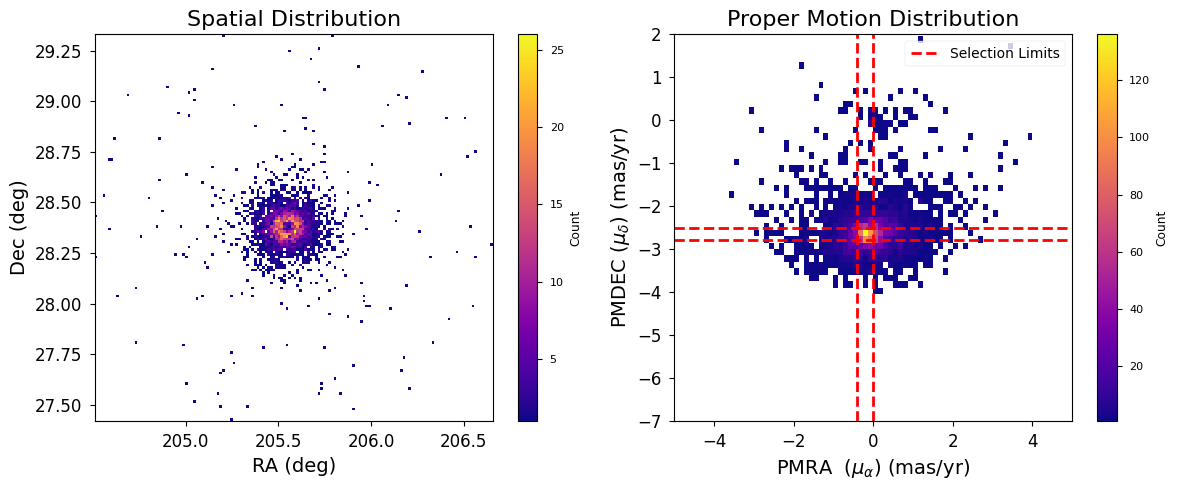

In [40]:
plt.style.use("seaborn-v0_8-paper")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ------------ RA vs Dec ------------
h1 = axes[0].hist2d(M3_data.ra, M3_data.dec, bins=150, cmin=1, cmap="plasma")
fig.colorbar(h1[3], ax=axes[0], label="Count")
axes[0].tick_params(axis='both', labelsize=12)
axes[0].set_xlabel("RA (deg)", fontsize=14)
axes[0].set_ylabel("Dec (deg)", fontsize=14)
axes[0].set_title("Spatial Distribution", fontsize=16)


# ------------ Proper Motion ------------
h2 = axes[1].hist2d(
    M3_data.pmra, M3_data.pmdec, bins=800, cmin=1, range=[[-50, 50], [-60, 60]], cmap="plasma"
)
fig.colorbar(h2[3], ax=axes[1], label="Count")
axes[1].set_xlabel(r"PMRA  ($\mu_{\alpha}$) (mas/yr)", fontsize=14)
axes[1].set_ylabel(r"PMDEC ($\mu_{\delta}$) (mas/yr)", fontsize=14)
axes[1].set_title("Proper Motion Distribution", fontsize=16)
axes[1].tick_params(axis='both', labelsize=12)
axes[1].set_xlim(-5, 5)
axes[1].set_ylim(-7, 2)
axes[1].axvline(pmra_lim_lo, color="red", linestyle="--", linewidth=2, label="Selection Limits")
axes[1].axvline(pmra_lim_hi, color="red", linestyle="--", linewidth=2)
axes[1].axhline(pmdec_lim_lo, color="red", linestyle="--", linewidth=2)
axes[1].axhline(pmdec_lim_hi, color="red", linestyle="--", linewidth=2)
axes[1].legend(fontsize=10)


plt.tight_layout()
plt.show()

# Apply the reddening correction

In [41]:
# Applying reddening correction
M3_data_dered = reddening_correction(M3_data)

# Describe both to see differences

M3_data_dered[["phot_bp_mean_mag","dered_BP", "phot_rp_mean_mag", "dered_RP", "phot_g_mean_mag", "dered_G"]].describe()


phot_bp_mean_mag     dered_BP  phot_rp_mean_mag     dered_RP  \
count       3256.000000  3256.000000       3256.000000  3256.000000   
mean          19.275503    19.237675         18.550373    18.528349   
std            1.389298     1.389066          1.462602     1.462525   
min           12.766565    12.732887         11.069802    11.048896   
25%           18.799900    18.762184         18.130029    18.108446   
50%           19.595710    19.559665         18.921394    18.899323   
75%           20.242970    20.205945         19.538676    19.516182   
max           21.664404    21.627424         20.773359    20.750513   

       phot_g_mean_mag      dered_G  
count      3256.000000  3256.000000  
mean         19.104649    19.073946  
std           1.377273     1.376927  
min          12.031279    12.005547  
25%          18.736764    18.706842  
50%          19.459290    19.428169  
75%          20.036572    20.005931  
max          20.499449    20.471056

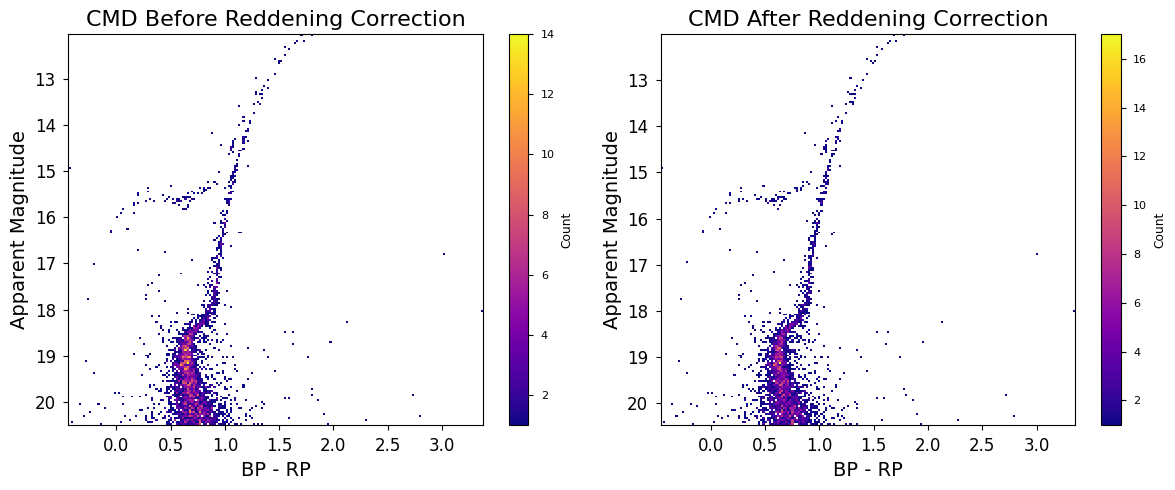

In [42]:
plt.style.use("seaborn-v0_8-paper")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
bp_rp_before = M3_data.phot_bp_mean_mag - M3_data.phot_rp_mean_mag
bp_rp_after = M3_data_dered.dered_BP - M3_data_dered.dered_RP
g_before = M3_data.phot_g_mean_mag
g_after = M3_data_dered.dered_G

# ------------ CMD Before Reddening Correction ------------
h1 = axes[0].hist2d(bp_rp_before, g_before, bins=200, cmin=1, cmap="plasma")
fig.colorbar(h1[3], ax=axes[0], label="Count")
axes[0].tick_params(axis="both", labelsize=12)
axes[0].set_xlabel("BP - RP", fontsize=14)
axes[0].set_ylabel("Apparent Magnitude", fontsize=14)
axes[0].set_title("CMD Before Reddening Correction", fontsize=16)
axes[0].invert_yaxis() 

# ------------ CMD After Reddening Correction ------------
h2 = axes[1].hist2d(bp_rp_after, g_after, bins=200, cmin=1, cmap="plasma")
fig.colorbar(h2[3], ax=axes[1], label="Count")
axes[1].tick_params(axis="both", labelsize=12)
axes[1].set_xlabel("BP - RP", fontsize=14)
axes[1].set_ylabel("Apparent Magnitude", fontsize=14)  # Fixed incorrect label
axes[1].set_title("CMD After Reddening Correction", fontsize=16)
axes[1].invert_yaxis()  

plt.tight_layout()
plt.show()



### Calculate Absolute Magnitude from Bailer Jones Distances

In [43]:
M3_data_dered["abs_G"] = M3_data_dered.dered_G - 5 * np.log10(M3_data_dered.r_med_photogeo) + 5

### Identifying Cluster Stars based on Proper Motions

In [44]:
M3_pm_filtered = M3_data_dered[
    (M3_data_dered.pmra > pmra_lim_lo) & (M3_data_dered.pmra < pmra_lim_hi) &
    (M3_data_dered.pmdec > pmdec_lim_lo) & (M3_data_dered.pmdec < pmdec_lim_hi)
]

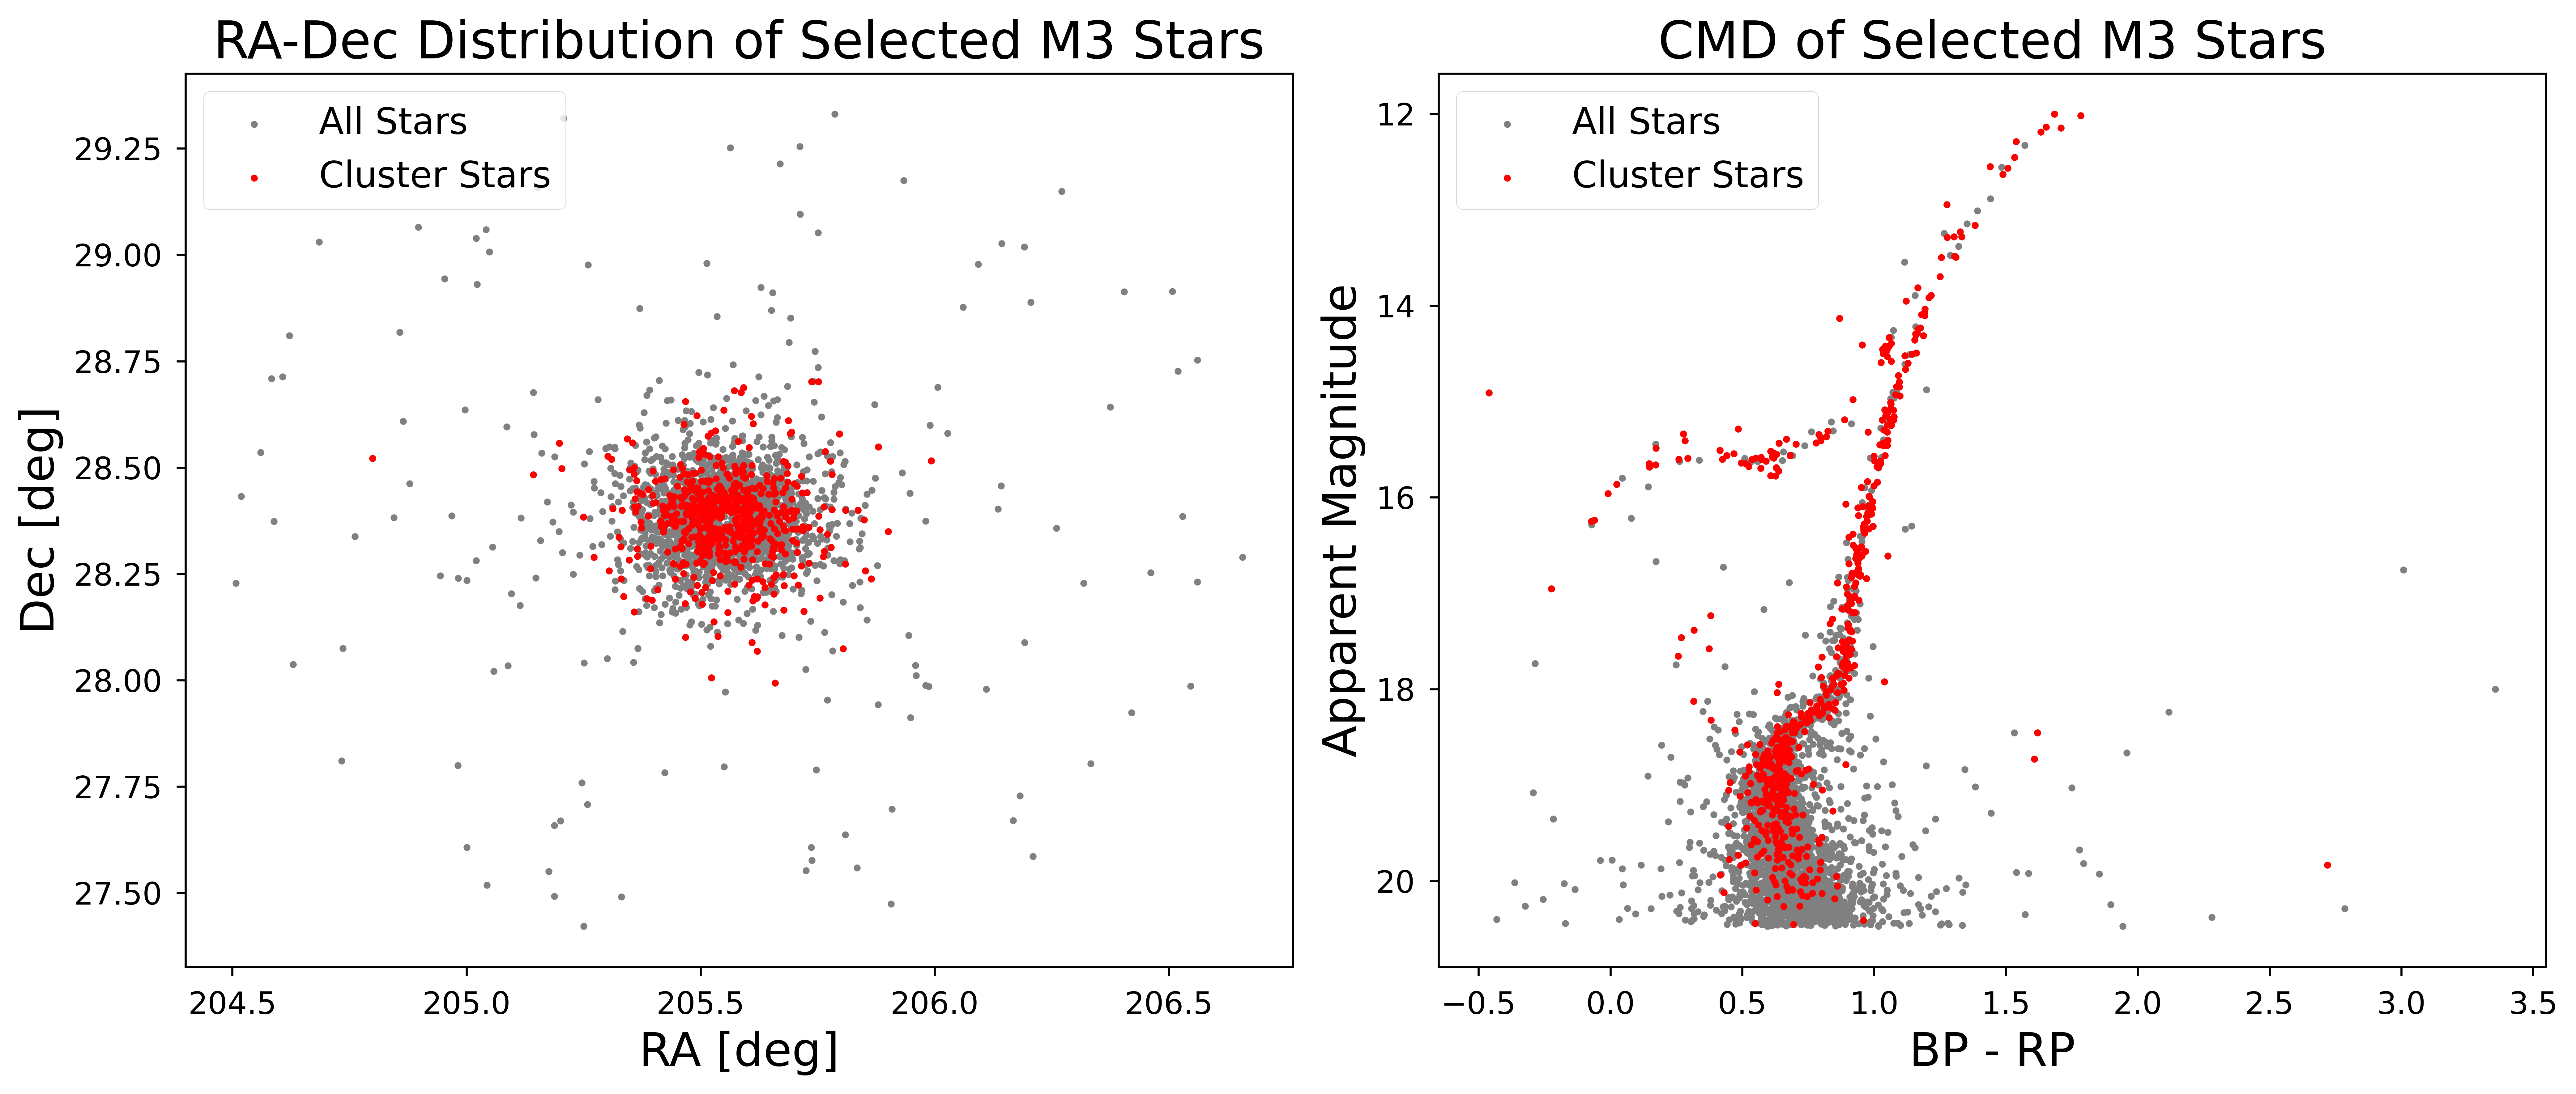

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=600)

# ------------ Display RA-Dec Cut ------------
axes[0].scatter(
    M3_data_dered.ra, M3_data_dered.dec, c="gray", s=6, alpha=1, label="All Stars"
)
axes[0].scatter(
    M3_pm_filtered.ra, M3_pm_filtered.dec, c="red", s=6, label="Cluster Stars"
)

axes[0].set_xlabel(r"RA [deg]", fontsize=18)
axes[0].set_ylabel(r"Dec [deg]", fontsize=18)
axes[0].legend(fontsize=14, loc="upper left")
axes[0].set_title("RA-Dec Distribution of Selected M3 Stars", fontsize=20)
axes[0].tick_params(axis="both", labelsize=12)

# ---------------- Display CMD Cut ----------------

axes[1].scatter(
    bp_rp_after, g_after, c="gray", s=6, alpha=1, label="All Stars"
)
axes[1].scatter(
    M3_pm_filtered.dered_BP - M3_pm_filtered.dered_RP, M3_pm_filtered.dered_G, c="red",
    s=6, label="Cluster Stars",
)

axes[1].set_xlabel(r"BP - RP", fontsize=18)
axes[1].set_ylabel(r"Apparent Magnitude", fontsize=18)
axes[1].legend(fontsize=14, loc="upper left")
axes[1].set_title("CMD of Selected M3 Stars", fontsize=20)
axes[1].tick_params(axis="both", labelsize=12)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()



In [46]:
# ---------------- Print Summary of Indetified Cluster Stars ----------------
summary_data = {
    "Cut Criteria": ["Initial Stars (Gaia Source)", "Cluster Stars from no cut (By PM cut)"],
    "Number of Stars": [len(M3_data_dered),f"{len(M3_pm_filtered)}: ({len(M3_pm_filtered)/len(M3_data_dered)*100:.1f}%)"]
}
summary_df = pd.DataFrame(summary_data)
display(summary_df)

Cut Criteria Number of Stars
0            Initial Stars (Gaia Source)            3256
1  Cluster Stars from no cut (By PM cut)    609: (18.7%)

## Success of Filtering Stars
### Preposed Cuts

| Parameter                | Value |
|--------------------------|-------|
| Proposed BP-RP Lower Cut | 0.8  |
| Proposed Magnitude Cut   | 18   |
| Proposed Parallax Cut    | -0.1  |
| Proposed Abs Mag Cut     | 5 | 


In [47]:
preposed_BP_RP_lo= 0.8
preposed_mag_cut = 18
preposed_parralax_cut = -0.1
preposed_abs_mag_cut = 4

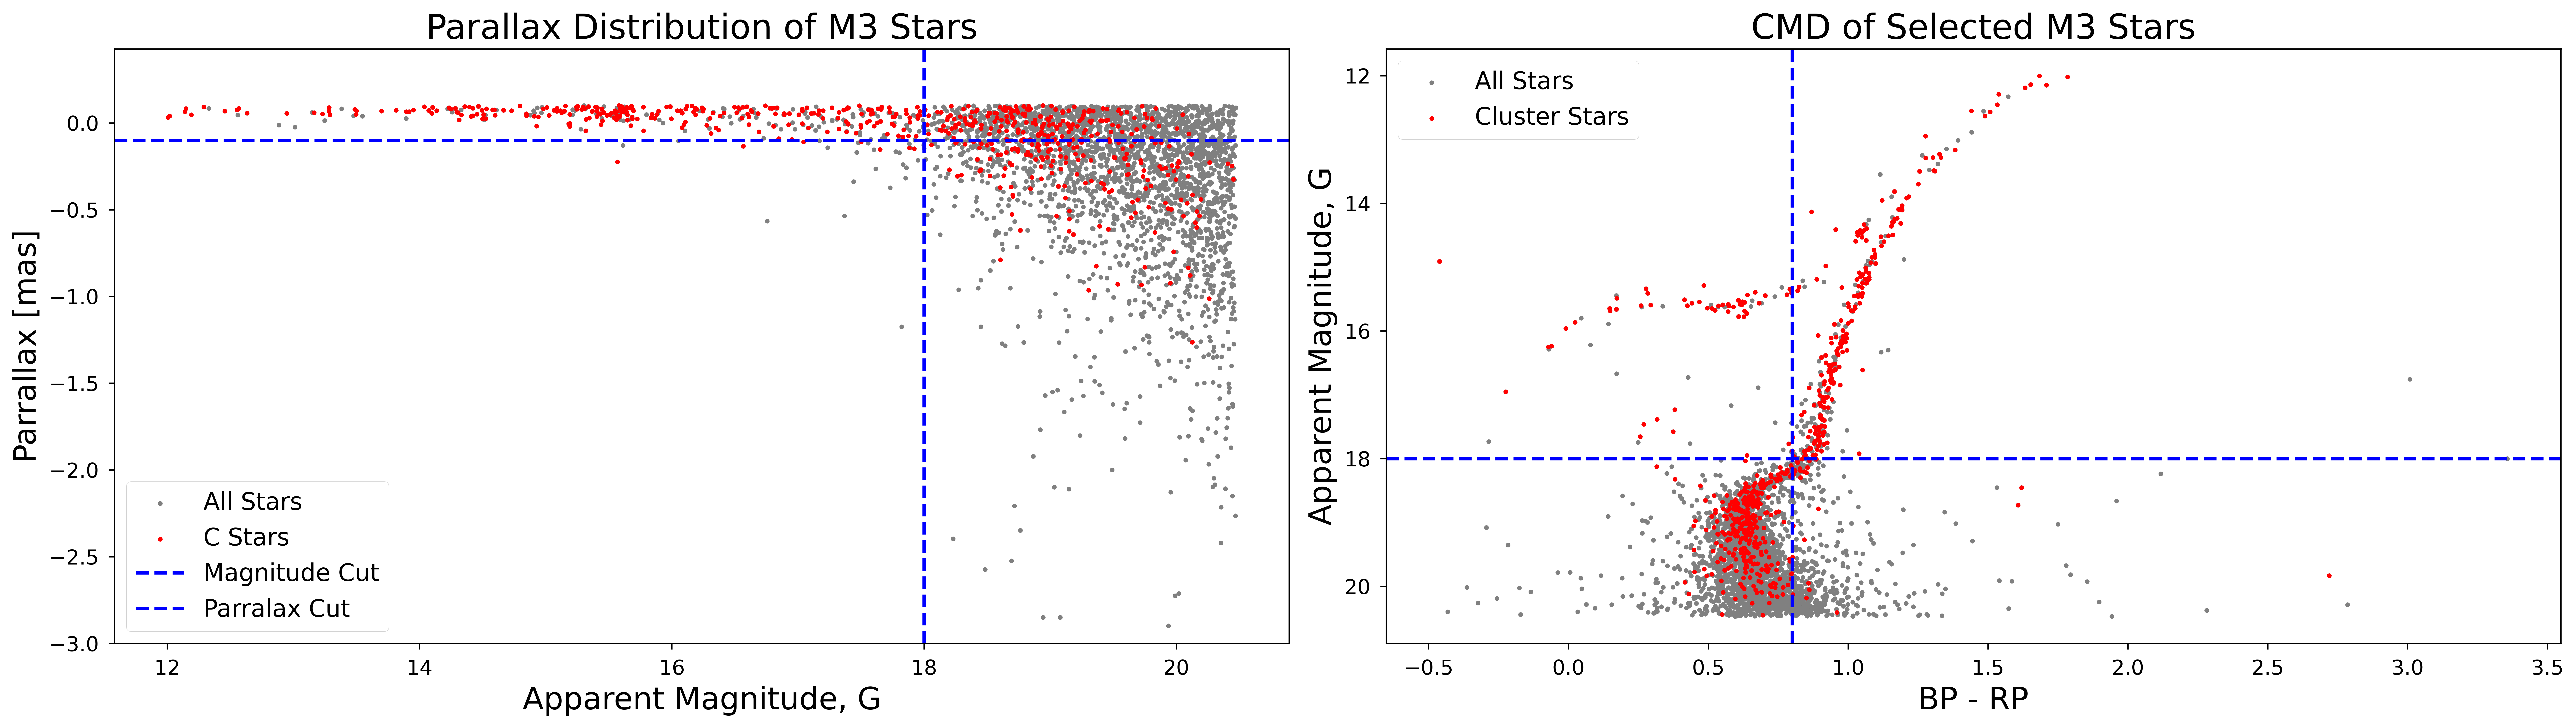

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(21, 6), dpi=600)

bp_rp_filtered, g_filtered = M3_pm_filtered.dered_BP - M3_pm_filtered.dered_RP, M3_pm_filtered.dered_G

# ------------ Display RA-Dec Cut ------------
axes[0].scatter(
    M3_data_dered.dered_G, M3_data_dered.parallax, c="gray", s=6, alpha=1, label="All Stars"
)
axes[0].scatter(
    M3_pm_filtered.dered_G, M3_pm_filtered.parallax, c="red", s=6, label="C Stars"
)

axes[0].axvline(preposed_mag_cut, color="blue", linestyle="--", linewidth=2, label="Magnitude Cut")
axes[0].axhline(preposed_parralax_cut, color="blue", linestyle="--", linewidth=2, label="Parralax Cut")
axes[0].set_ylim(-3, None)

axes[0].set_xlabel(r"Apparent Magnitude, G", fontsize=18)
axes[0].set_ylabel(r"Parrallax [mas]", fontsize=18)
axes[0].legend(fontsize=14, loc="lower left")
axes[0].set_title("Parallax Distribution of M3 Stars", fontsize=20)
axes[0].tick_params(axis="both", labelsize=12)

# ---------------- Display CMD Cut ----------------

axes[1].scatter(
    bp_rp_after, g_after, c="gray", s=6, alpha=1, label="All Stars"
)
axes[1].scatter(
    bp_rp_filtered, g_filtered, c="red",
    s=6, label="Cluster Stars",
)

axes[1].set_xlabel(r"BP - RP", fontsize=18)
axes[1].set_ylabel(r"Apparent Magnitude, G", fontsize=18)
axes[1].legend(fontsize=14, loc="upper left")
axes[1].set_title("CMD of Selected M3 Stars", fontsize=20)
axes[1].tick_params(axis="both", labelsize=12)
axes[1].invert_yaxis()
axes[1].axvline(preposed_BP_RP_lo, color="blue", linestyle="--", linewidth=2, label="Magnitude Cut")
axes[1].axhline(preposed_mag_cut, color="blue", linestyle="--", linewidth=2, label="Magnitude Cut")

plt.tight_layout()
plt.show()

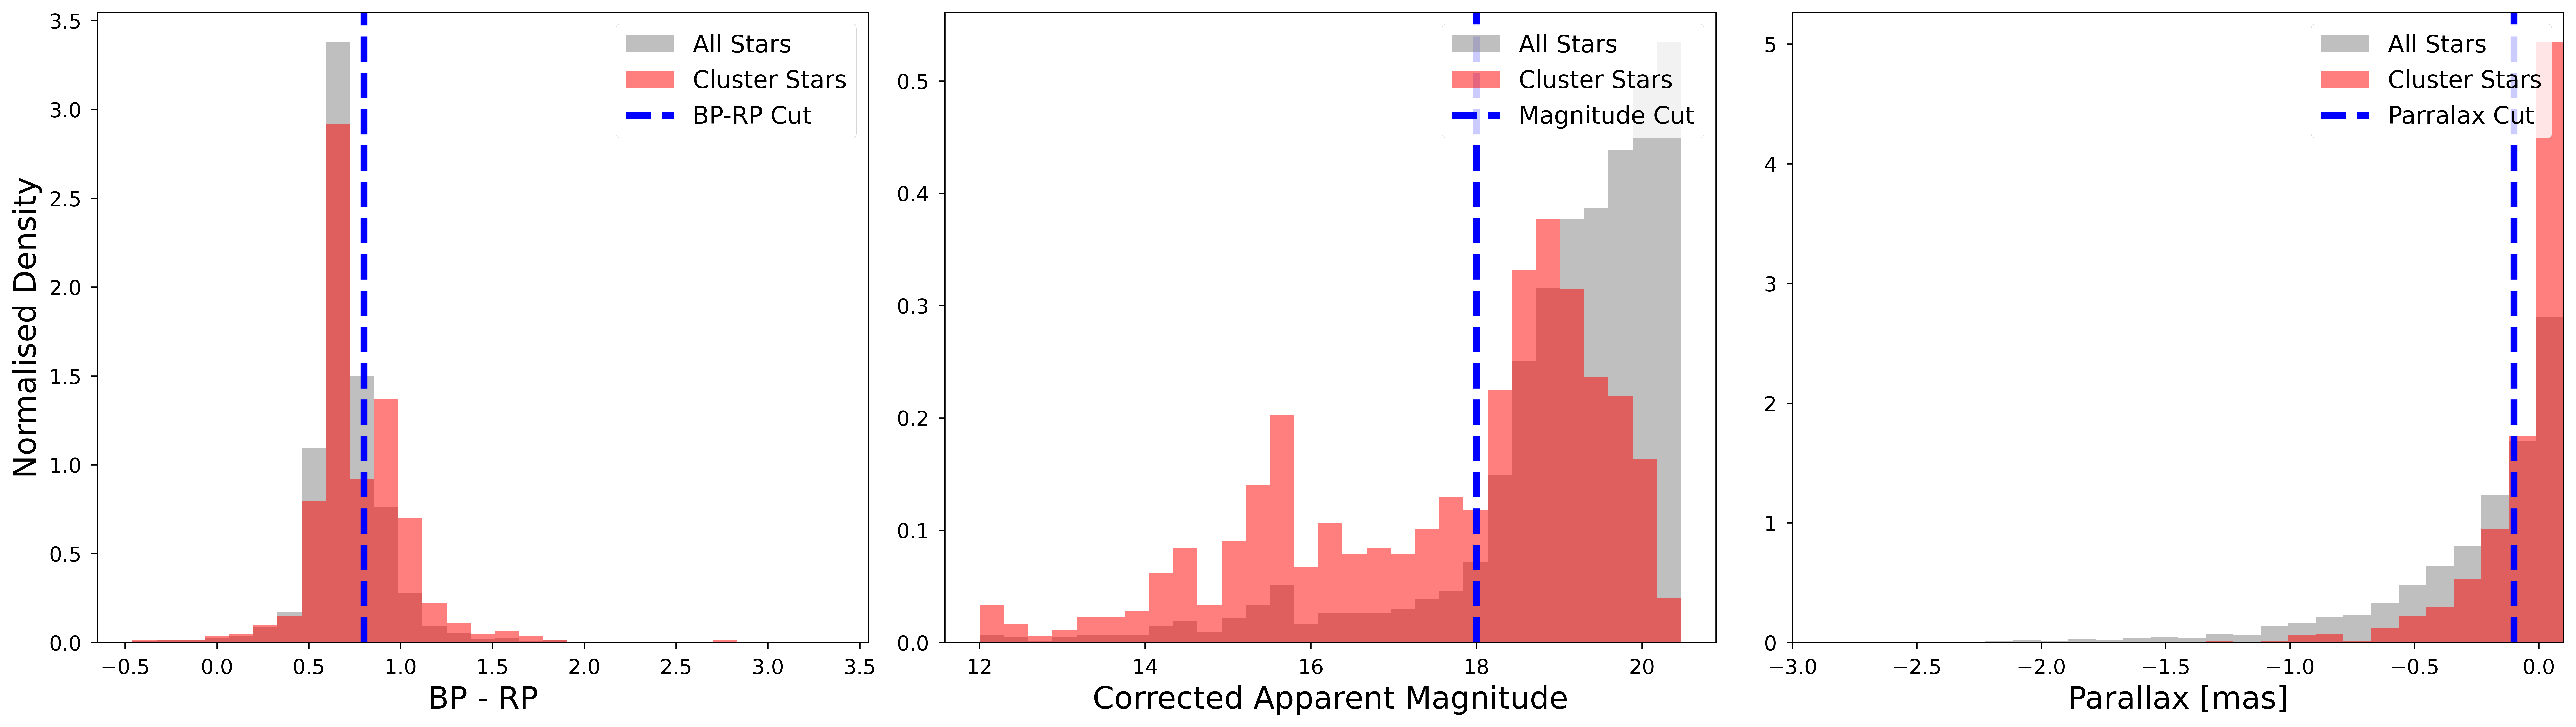

In [59]:
# ---------------- Halo RGB Filter ----------------

fig, axes = plt.subplots(1, 3, figsize=(21, 6), dpi=600)


# ------------ Display Normalized Parallax Histogram ------------
bins = np.linspace(min(bp_rp_after.min(), bp_rp_filtered.min()),
                   max(bp_rp_after.max(), bp_rp_filtered.max()), 30)

axes[0].hist(
    bp_rp_after, bins=bins, density=True, alpha=0.5, color="gray", label="All Stars"
)
axes[0].hist(
    bp_rp_filtered, bins=bins, density=True, alpha=0.5, color="red", label="Cluster Stars"
)

axes[0].axvline(preposed_BP_RP_lo, color="blue", linestyle="--", linewidth=4, label="BP-RP Cut")
axes[0].set_xlabel("BP - RP", fontsize=18)
axes[0].set_ylabel("Normalised Density", fontsize=18)
axes[0].legend(fontsize=14, loc="upper right")
axes[0].tick_params(axis="both", labelsize=12)

# ------------ Display Normalized Parallax Histogram ------------
bins = np.linspace(min(M3_data_dered.dered_G.min(), M3_pm_filtered.dered_G.min()),
                   max(M3_data_dered.dered_G.max(), M3_pm_filtered.dered_G.max()), 30)

axes[1].hist(
    M3_data_dered.dered_G, bins=bins, density=True, alpha=0.5, color="gray", label="All Stars"
)
axes[1].hist(
    M3_pm_filtered.dered_G, bins=bins, density=True, alpha=0.5, color="red", label="Cluster Stars"
)

axes[1].axvline(preposed_mag_cut, color="blue", linestyle="--", linewidth=4, label="Magnitude Cut")

axes[1].set_xlabel("Corrected Apparent Magnitude", fontsize=18)
axes[1].legend(fontsize=14, loc="upper right")
axes[1].tick_params(axis="both", labelsize=12)

# ------------ Display Normalized Parallax Histogram ------------
bins = np.linspace(min(M3_data_dered.parallax.min(), M3_pm_filtered.parallax.min()),
                   max(M3_data_dered.parallax.max(), M3_pm_filtered.parallax.max()), 60)

axes[2].hist(
    M3_data_dered.parallax, bins=bins, density=True, alpha=0.5, color="gray", label="All Stars"
)
axes[2].hist(
    M3_pm_filtered.parallax, bins=bins, density=True, alpha=0.5, color="red", label="Cluster Stars"
)

axes[2].axvline(preposed_parralax_cut, color="blue", linestyle="--", linewidth=4, label="Parralax Cut")
axes[2].set_xlabel("Parallax [mas]", fontsize=18)
axes[2].legend(fontsize=14, loc="upper right")
axes[2].tick_params(axis="both", labelsize=12)
axes[2].set_xlim(-3, 0.1)

# Improve layout and show the plot
plt.tight_layout()
plt.show()


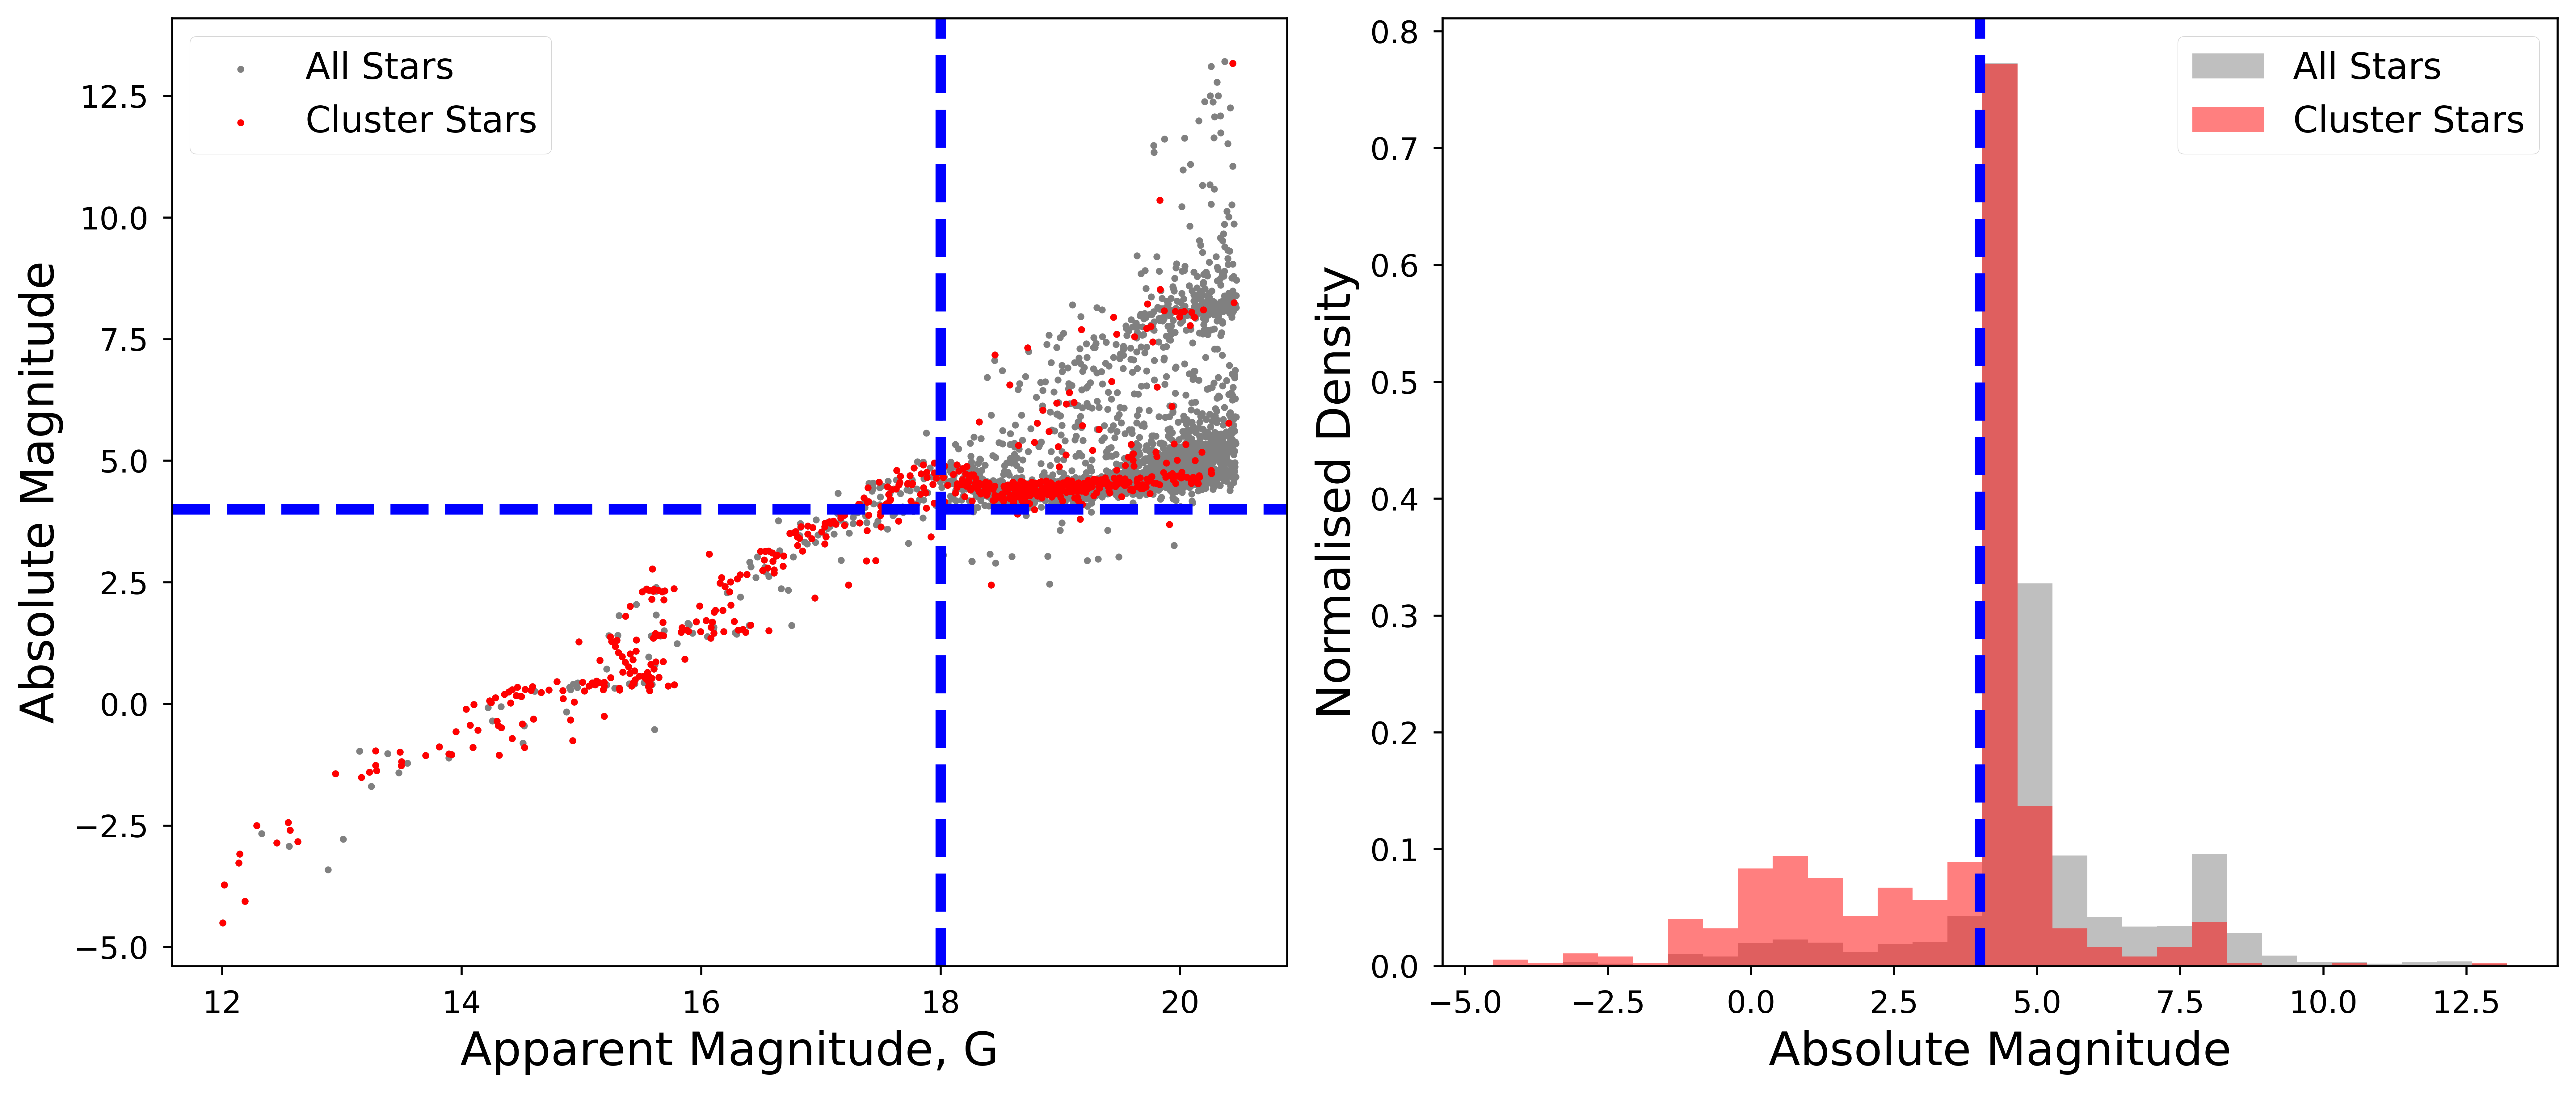

Cut Criteria  Total Number of Stars  No. of Cluster Stars  \
0                  No Cut                   3256                   609   
1      With Magnitude Cut                    410                   262   
2  With Abs Magnitude Cut                    350                   225   
3               Both Cuts                    322                   220   

  Percentage of Cluster Stars Percentage Improvement From Cut  
0                       18.7%                             N/A  
1                       63.9%                           45.2%  
2                       64.3%                           45.6%  
3                       68.3%                           49.6%

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=600)

# ------------ Display Scatter Plot: Absolute Magnitude vs Corrected G Magnitude ------------
axes[0].scatter(
    M3_data_dered.dered_G, M3_data_dered.abs_G, c="gray", s=6, alpha=1, label="All Stars"
)
axes[0].scatter(
    M3_pm_filtered.dered_G, M3_pm_filtered.abs_G, c="red", s=6, label="Cluster Stars"
)

axes[0].set_xlabel(r"Apparent Magnitude, G", fontsize=18)
axes[0].set_ylabel(r"Absolute Magnitude", fontsize=18)
axes[0].legend(fontsize=14, loc="upper left")
axes[0].tick_params(axis="both", labelsize=12)

axes[0].axvline(preposed_mag_cut, color="blue", linestyle="--", linewidth=4, label="Magnitude Cut")
axes[0].axhline(preposed_abs_mag_cut, color="blue", linestyle="--", linewidth=4, label="Abs Mag Cut")

# ------------ Display Normalised Absolute Magnitude Histogram ------------
bins = np.linspace(min(M3_data_dered.abs_G.min(), M3_pm_filtered.abs_G.min()),
                   max(M3_data_dered.abs_G.max(), M3_pm_filtered.abs_G.max()), 30)

axes[1].hist(
    M3_data_dered.abs_G, bins=bins, density=True, alpha=0.5, color="gray", label="All Stars"
)
axes[1].hist(
    M3_pm_filtered.abs_G, bins=bins, density=True, alpha=0.5, color="red", label="Cluster Stars"
)

axes[1].set_xlabel(r"Absolute Magnitude", fontsize=18)
axes[1].set_ylabel("Normalised Density", fontsize=18)
axes[1].legend(fontsize=14, loc="upper right")
axes[1].tick_params(axis="both", labelsize=12)
axes[1].axvline(preposed_abs_mag_cut, color="blue", linestyle="--", linewidth=4, label="Abs Mag Cut")
plt.tight_layout()
plt.show()


# Comparison on filters
# Magnitude Cut
M3_data_dered_mag_cut = M3_data_dered[M3_data_dered.dered_G < preposed_mag_cut]
M3_pm_filtered_mag_cut = M3_pm_filtered[M3_pm_filtered.dered_G < preposed_mag_cut]

# Abs Mag Cut
M3_data_dered_abs_mag_cut = M3_data_dered[M3_data_dered.abs_G < preposed_abs_mag_cut]
M3_pm_filtered_abs_mag_cut = M3_pm_filtered[M3_pm_filtered.abs_G < preposed_abs_mag_cut]

# All Cuts
M3_data_dered_all_cuts_mag = M3_data_dered[
    (M3_data_dered.dered_G < preposed_mag_cut) &
    (M3_data_dered.abs_G < preposed_abs_mag_cut)
]
M3_pm_filtered_all_cuts_mag = M3_pm_filtered[
    (M3_pm_filtered.dered_G < preposed_mag_cut) &
    (M3_pm_filtered.abs_G < preposed_abs_mag_cut)
]

summary_data_mag = {
    "Cut Criteria": ["No Cut", "With Magnitude Cut", "With Abs Magnitude Cut", "Both Cuts"],
    "Total Number of Stars": [
        len(M3_data_dered),
        len(M3_data_dered_mag_cut),
        len(M3_data_dered_abs_mag_cut),
        len(M3_data_dered_all_cuts_mag)
    ],
    "No. of Cluster Stars": [
        len(M3_pm_filtered),
        len(M3_pm_filtered_mag_cut),
        len(M3_pm_filtered_abs_mag_cut),
        len(M3_pm_filtered_all_cuts_mag)
    ],
    "Percentage of Cluster Stars": [
        f"{len(M3_pm_filtered)/len(M3_data_dered)*100:.1f}%",
        f"{len(M3_pm_filtered_mag_cut)/len(M3_data_dered_mag_cut)*100:.1f}%",
        f"{len(M3_pm_filtered_abs_mag_cut)/len(M3_data_dered_abs_mag_cut)*100:.1f}%",
        f"{len(M3_pm_filtered_all_cuts_mag)/len(M3_data_dered_all_cuts_mag)*100:.1f}%"
    ],
    "Percentage Improvement From Cut": [
        "N/A",
        f"{(len(M3_pm_filtered_mag_cut)/len(M3_data_dered_mag_cut)*100 - len(M3_pm_filtered)/len(M3_data_dered)*100):.1f}%",
        f"{(len(M3_pm_filtered_abs_mag_cut)/len(M3_data_dered_abs_mag_cut)*100 - len(M3_pm_filtered)/len(M3_data_dered)*100):.1f}%",
        f"{(len(M3_pm_filtered_all_cuts_mag)/len(M3_data_dered_all_cuts_mag)*100 - len(M3_pm_filtered)/len(M3_data_dered)*100):.1f}%"
    ]
}
summary_df = pd.DataFrame(summary_data_mag)
display(summary_df)

In [51]:
M3_pm_filtered = M3_data_dered[
    (M3_data_dered.pmra > pmra_lim_lo) & (M3_data_dered.pmra < pmra_lim_hi) &
    (M3_data_dered.pmdec > pmdec_lim_lo) & (M3_data_dered.pmdec < pmdec_lim_hi)
]

## Success Statistics

In [52]:
# ---------------- Print Summary of Star Numbers after cut ----------------
# Magnitude Cut
M3_data_dered_mag_cut = M3_data_dered[M3_data_dered.dered_G < preposed_mag_cut]
M3_pm_filtered_mag_cut = M3_pm_filtered[M3_pm_filtered.dered_G < preposed_mag_cut]

# Lower BP-RP Cut
M3_data_dered_bp_rp_lo_cut = M3_data_dered[M3_data_dered.dered_BP - M3_data_dered.dered_RP > preposed_BP_RP_lo]
M3_pm_filtered_bp_rp_lo_cut = M3_pm_filtered[M3_pm_filtered.dered_BP - M3_pm_filtered.dered_RP > preposed_BP_RP_lo]


# Parallax Cut
M3_data_dered_parallax_cut = M3_data_dered[M3_data_dered.parallax > preposed_parralax_cut]
M3_pm_filtered_parallax_cut = M3_pm_filtered[M3_pm_filtered.parallax > preposed_parralax_cut]

# Abs Mag Cut
M3_data_dered_abs_mag_cut = M3_data_dered[M3_data_dered.abs_G < preposed_abs_mag_cut]
M3_pm_filtered_abs_mag_cut = M3_pm_filtered[M3_pm_filtered.abs_G < preposed_abs_mag_cut]

# All Cuts
M3_data_dered_all_cuts = M3_data_dered[
    (M3_data_dered.dered_G < preposed_mag_cut) &
    (M3_data_dered.dered_BP - M3_data_dered.dered_RP > preposed_BP_RP_lo) &
    (M3_data_dered.parallax > preposed_parralax_cut) 
    # & (M3_data_dered.abs_G < preposed_abs_mag_cut)
]
M3_pm_filtered_all_cuts = M3_pm_filtered[
    (M3_pm_filtered.dered_G < preposed_mag_cut) &
    (M3_pm_filtered.dered_BP - M3_pm_filtered.dered_RP > preposed_BP_RP_lo) &
    (M3_pm_filtered.parallax > preposed_parralax_cut) 
    # & (M3_pm_filtered.abs_G < preposed_abs_mag_cut)
]

summary_data = {
    "Cut Criteria": ["No Cut", "With Magnitude Cut", "With BP-RP Lower Cut", "With Parallax Cut", "All Cuts"],
    "Total Number of Stars": [
        len(M3_data_dered),
        len(M3_data_dered_mag_cut),
        # len(M3_data_dered_abs_mag_cut),
        len(M3_data_dered_bp_rp_lo_cut),
        len(M3_data_dered_parallax_cut),
        len(M3_data_dered_all_cuts)
    ],
    "No. of Cluster Stars": [
        len(M3_pm_filtered),
        len(M3_pm_filtered_mag_cut),
        # len(M3_pm_filtered_abs_mag_cut),
        len(M3_pm_filtered_bp_rp_lo_cut),
        len(M3_pm_filtered_parallax_cut),
        len(M3_pm_filtered_all_cuts)
    ],
    "Percentage of Cluster Stars": [
        f"{len(M3_pm_filtered)/len(M3_data_dered)*100:.1f}%",
        f"{len(M3_pm_filtered_mag_cut)/len(M3_data_dered_mag_cut)*100:.1f}%",
        # f"{len(M3_pm_filtered_abs_mag_cut)/len(M3_data_dered_abs_mag_cut)*100:.1f}%",
        f"{len(M3_pm_filtered_bp_rp_lo_cut)/len(M3_data_dered_bp_rp_lo_cut)*100:.1f}%",
        f"{len(M3_pm_filtered_parallax_cut)/len(M3_data_dered_parallax_cut)*100:.1f}%",
        f"{len(M3_pm_filtered_all_cuts)/len(M3_data_dered_all_cuts)*100:.1f}%"
    ],
    "Percentage Improvement From Cut": [
        "N/A",
        f"{(len(M3_pm_filtered_mag_cut)/len(M3_data_dered_mag_cut)*100 - len(M3_pm_filtered)/len(M3_data_dered)*100):.1f}%",
        # f"{(len(M3_pm_filtered_abs_mag_cut)/len(M3_data_dered_abs_mag_cut)*100 - len(M3_pm_filtered)/len(M3_data_dered)*100):.1f}%",
        f"{(len(M3_pm_filtered_bp_rp_lo_cut)/len(M3_data_dered_bp_rp_lo_cut)*100 - len(M3_pm_filtered)/len(M3_data_dered)*100):.1f}%",
        f"{(len(M3_pm_filtered_parallax_cut)/len(M3_data_dered_parallax_cut)*100 - len(M3_pm_filtered)/len(M3_data_dered)*100):.1f}%",
        f"{(len(M3_pm_filtered_all_cuts)/len(M3_data_dered_all_cuts)*100 - len(M3_pm_filtered)/len(M3_data_dered)*100):.1f}%"
    ]
}

summary_df = pd.DataFrame(summary_data)
display(summary_df)

Cut Criteria  Total Number of Stars  No. of Cluster Stars  \
0                No Cut                   3256                   609   
1    With Magnitude Cut                    410                   262   
2  With BP-RP Lower Cut                    769                   235   
3     With Parallax Cut                   1479                   431   
4              All Cuts                    305                   202   

  Percentage of Cluster Stars Percentage Improvement From Cut  
0                       18.7%                             N/A  
1                       63.9%                           45.2%  
2                       30.6%                           11.9%  
3                       29.1%                           10.4%  
4                       66.2%                           47.5%

## Investigating Validity of other potential Cuts (Surface Temp and Log G from Gaia)
### These are found not to be viable due to the inaccuracy of this data from gaia

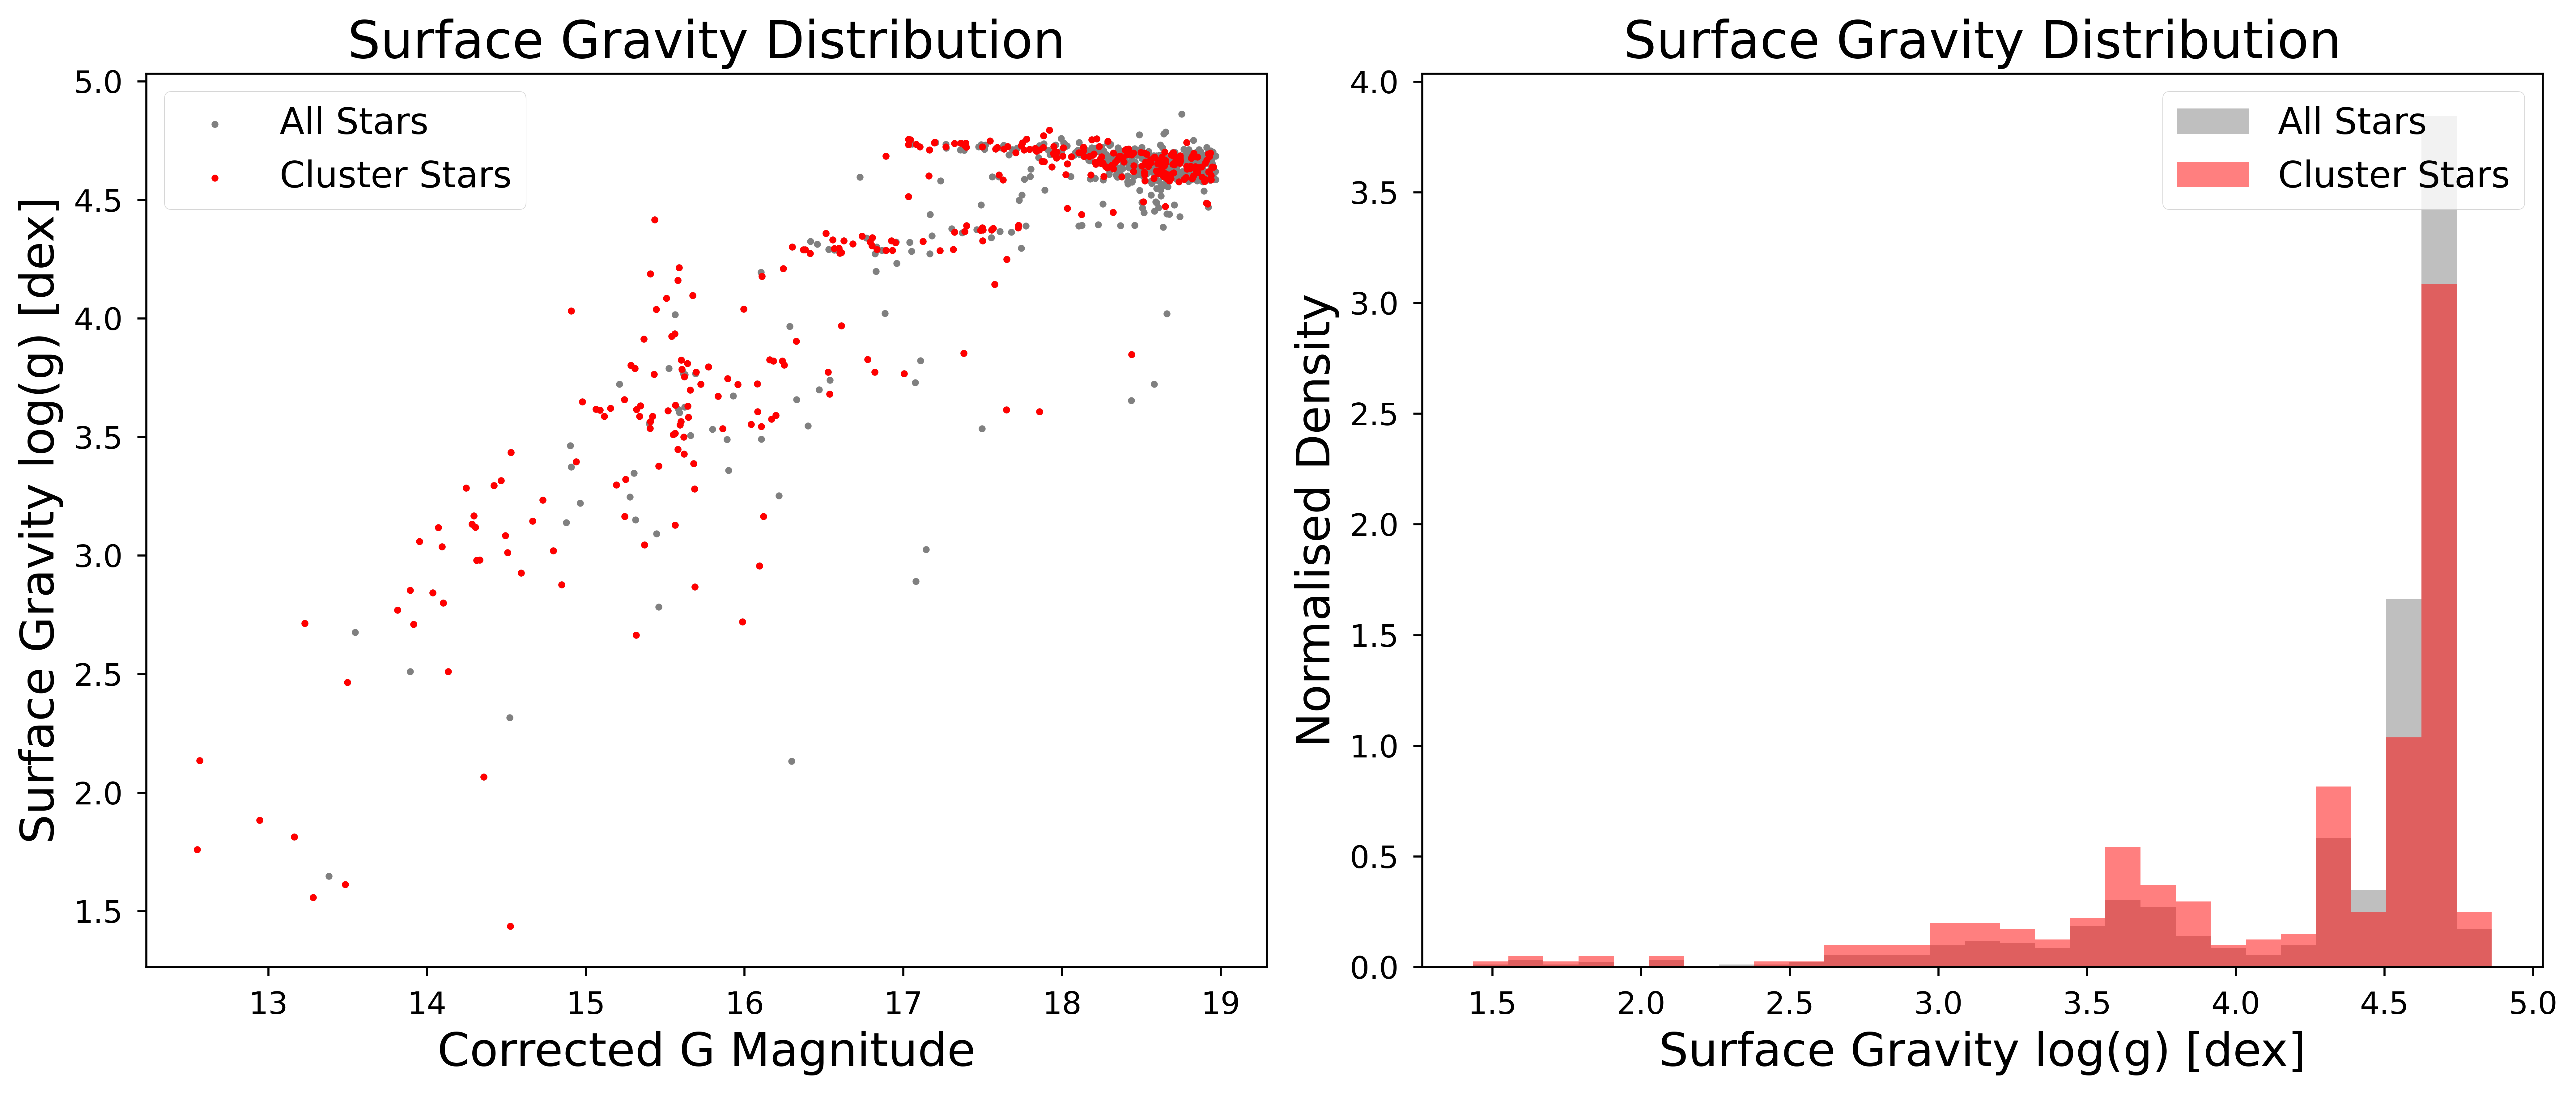

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=600)

# ------------ Display Scatter Plot: logg_gspphot vs Corrected G Magnitude ------------
axes[0].scatter(
    M3_data_dered.dered_G, M3_data_dered.logg_gspphot, c="gray", s=6, alpha=1, label="All Stars"
)
axes[0].scatter(
    M3_pm_filtered.dered_G, M3_pm_filtered.logg_gspphot, c="red", s=6, label="Cluster Stars"
)

axes[0].set_xlabel(r"Corrected G Magnitude", fontsize=18)
axes[0].set_ylabel(r"Surface Gravity log(g) [dex]", fontsize=18)
axes[0].legend(fontsize=14, loc="upper left")
axes[0].set_title("Surface Gravity Distribution", fontsize=20)
axes[0].tick_params(axis="both", labelsize=12)

# ------------ Display Normalized logg_gspphot Histogram ------------
bins = np.linspace(min(M3_data_dered.logg_gspphot.min(), M3_pm_filtered.logg_gspphot.min()),
                   max(M3_data_dered.logg_gspphot.max(), M3_pm_filtered.logg_gspphot.max()), 30)

axes[1].hist(
    M3_data_dered.logg_gspphot, bins=bins, density=True, alpha=0.5, color="gray", label="All Stars"
)
axes[1].hist(
    M3_pm_filtered.logg_gspphot, bins=bins, density=True, alpha=0.5, color="red", label="Cluster Stars"
)

axes[1].set_xlabel(r"Surface Gravity log(g) [dex]", fontsize=18)
axes[1].set_ylabel("Normalised Density", fontsize=18)
axes[1].legend(fontsize=14, loc="upper right")
axes[1].set_title("Surface Gravity Distribution", fontsize=20)
axes[1].tick_params(axis="both", labelsize=12)

# Improve layout and show the plot
plt.tight_layout()
plt.show()

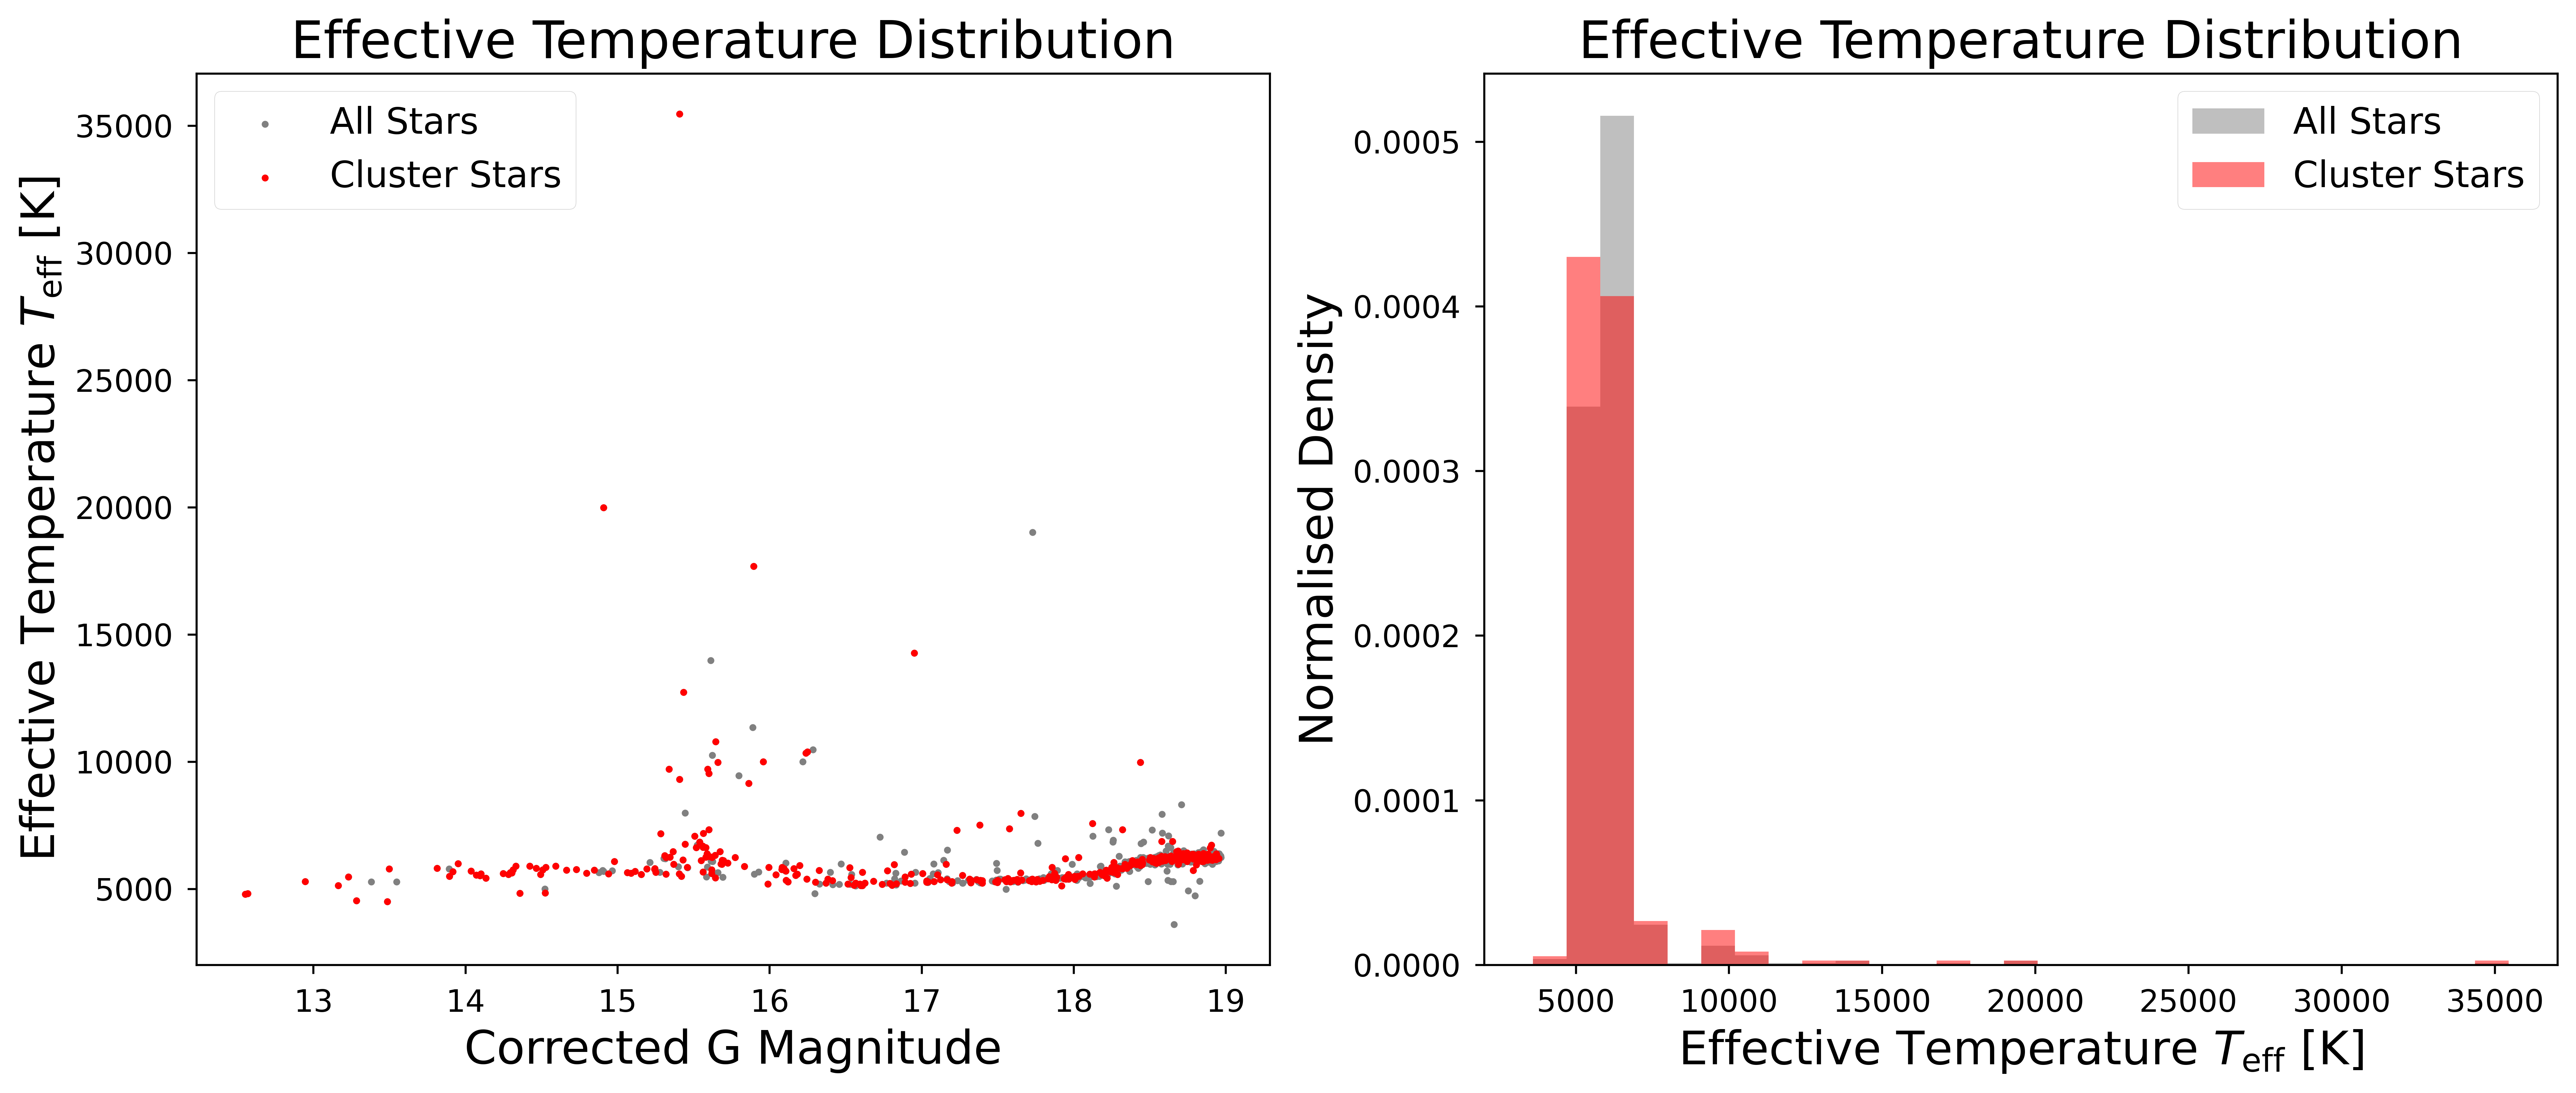

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=600)

# ------------ Display Scatter Plot: teff_gspphot vs Corrected G Magnitude ------------
axes[0].scatter(
    M3_data_dered.dered_G, M3_data_dered.teff_gspphot, c="gray", s=6, alpha=1, label="All Stars"
)
axes[0].scatter(
    M3_pm_filtered.dered_G, M3_pm_filtered.teff_gspphot, c="red", s=6, label="Cluster Stars"
)

axes[0].set_xlabel(r"Corrected G Magnitude", fontsize=18)
axes[0].set_ylabel(r"Effective Temperature $T_{\mathrm{eff}}$ [K]", fontsize=18)
axes[0].legend(fontsize=14, loc="upper left")
axes[0].set_title("Effective Temperature Distribution", fontsize=20)
axes[0].tick_params(axis="both", labelsize=12)

# ------------ Display Normalized teff_gspphot Histogram ------------
bins = np.linspace(min(M3_data_dered.teff_gspphot.min(), M3_pm_filtered.teff_gspphot.min()),
                   max(M3_data_dered.teff_gspphot.max(), M3_pm_filtered.teff_gspphot.max()), 30)

axes[1].hist(
    M3_data_dered.teff_gspphot, bins=bins, density=True, alpha=0.5, color="gray", label="All Stars"
)
axes[1].hist(
    M3_pm_filtered.teff_gspphot, bins=bins, density=True, alpha=0.5, color="red", label="Cluster Stars"
)

axes[1].set_xlabel(r"Effective Temperature $T_{\mathrm{eff}}$ [K]", fontsize=18)
axes[1].set_ylabel("Normalised Density", fontsize=18)
axes[1].legend(fontsize=14, loc="upper right")
axes[1].set_title("Effective Temperature Distribution", fontsize=20)
axes[1].tick_params(axis="both", labelsize=12)

# Improve layout and show the plot
plt.tight_layout()
plt.show()

### Investigating the Bailer Jones Distances - Show unreliable for cluster detection 

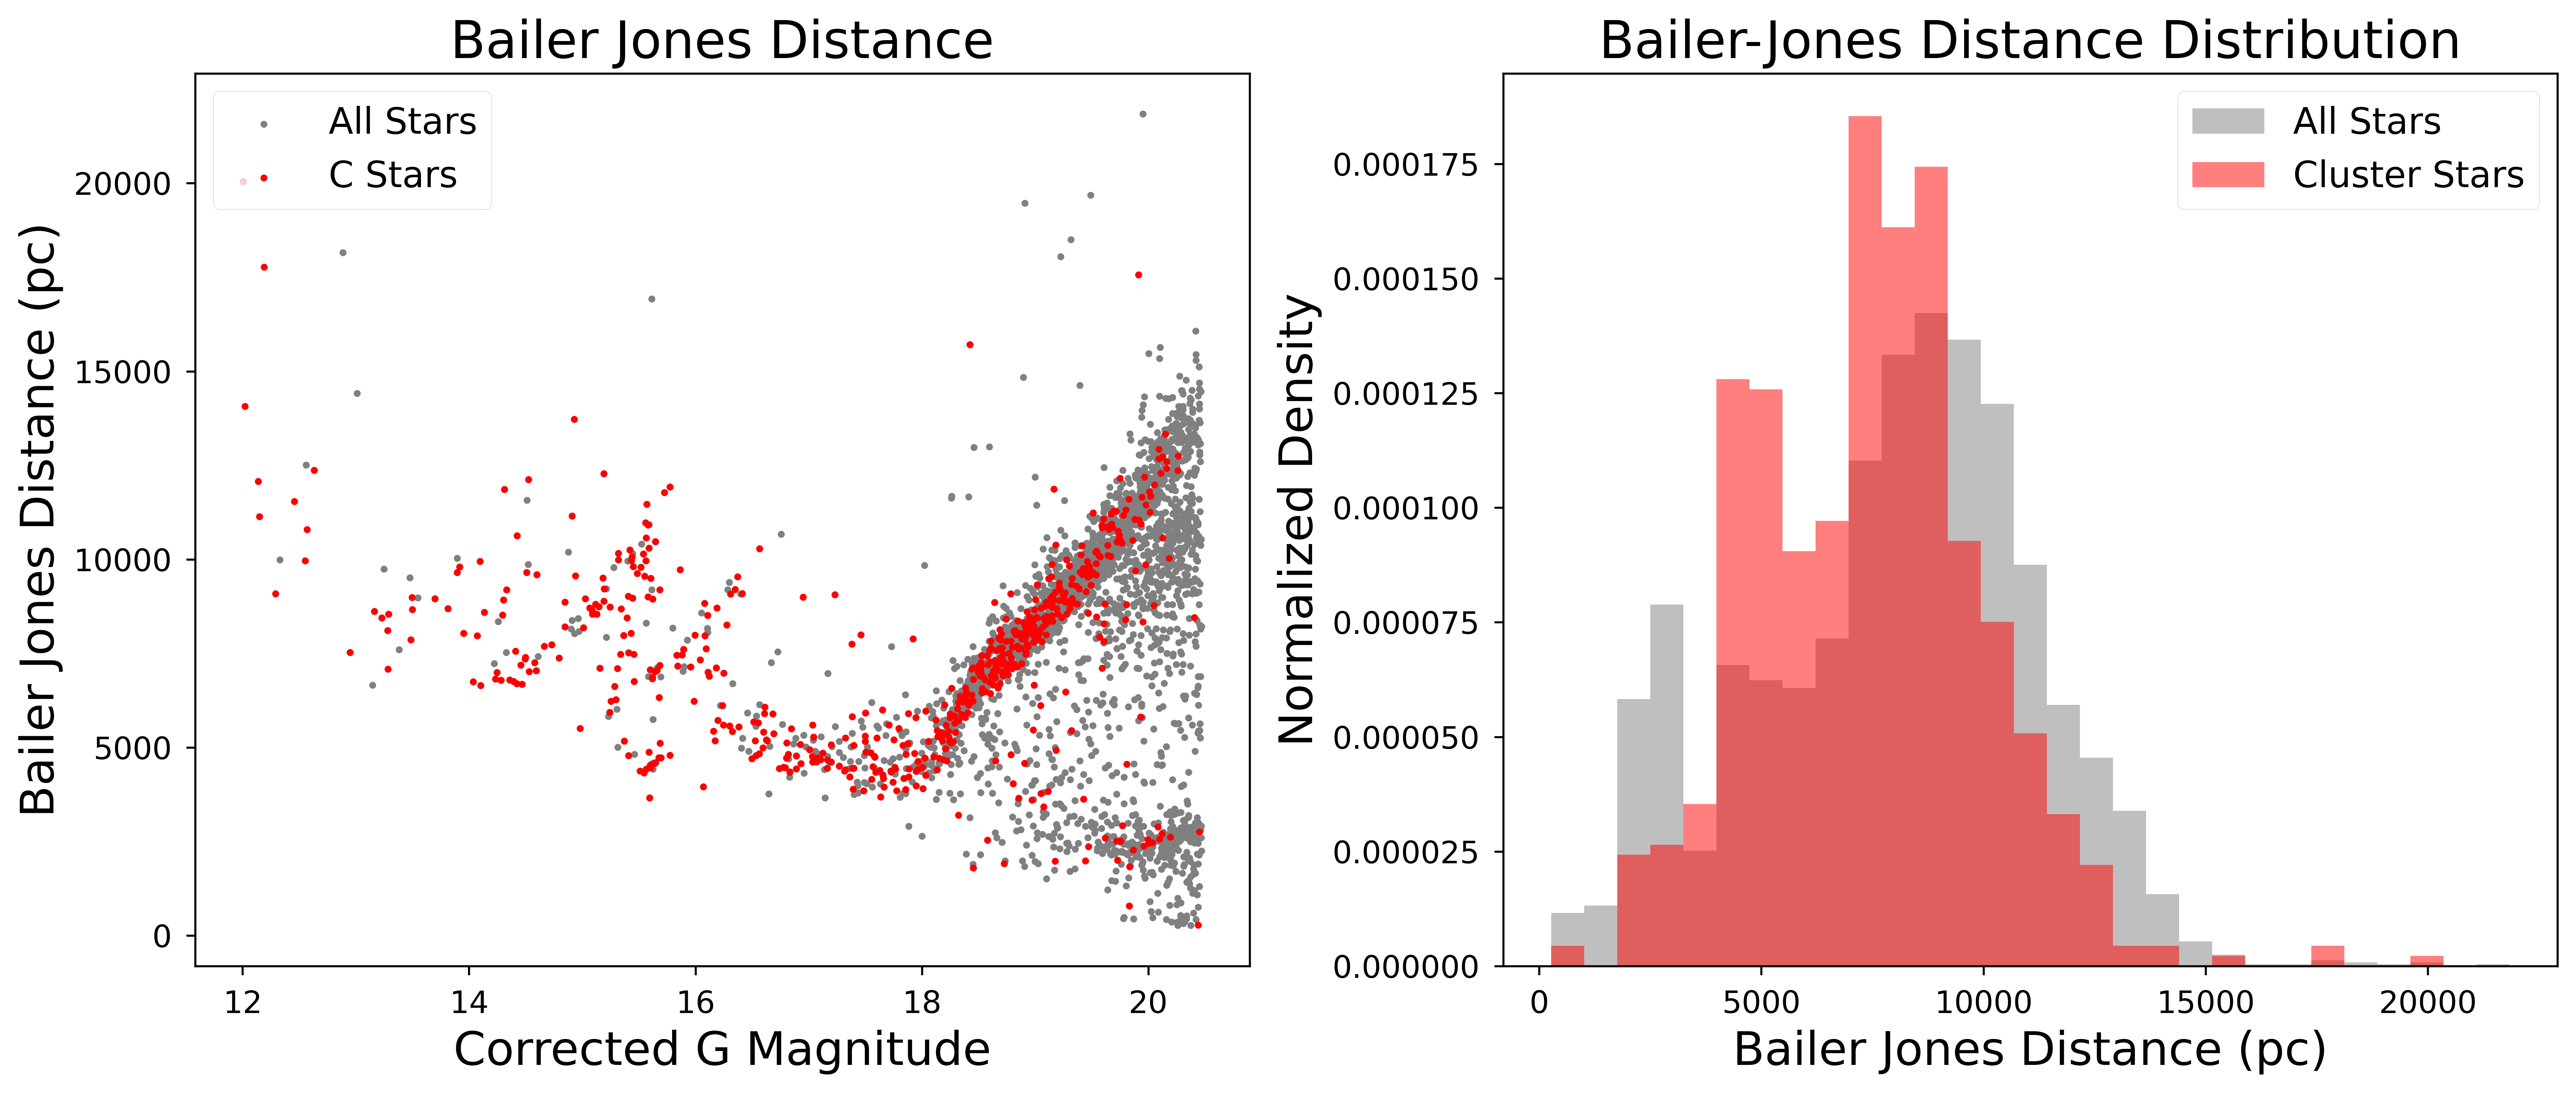

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=600)

# ------------ Display RA-Dec Cut ------------
axes[0].scatter(
    M3_data_dered.dered_G, M3_data_dered.r_med_photogeo, c="gray", s=6, alpha=1, label="All Stars"
)
axes[0].scatter(
    M3_pm_filtered.dered_G, M3_pm_filtered.r_med_photogeo, c="red", s=6, label="C Stars"
)

axes[0].set_xlabel(r"Corrected G Magnitude", fontsize=18)
axes[0].set_ylabel(r"Bailer Jones Distance (pc)", fontsize=18)
axes[0].legend(fontsize=14, loc="upper left")
axes[0].set_title("Bailer Jones Distance", fontsize=20)
axes[0].tick_params(axis="both", labelsize=12)

# ------------ Display Normalized Parallax Histogram ------------
bins = np.linspace(min(M3_data_dered.r_med_photogeo.min(), M3_pm_filtered.r_med_photogeo.min()),
                   max(M3_data_dered.r_med_photogeo.max(), M3_pm_filtered.r_med_photogeo.max()), 30)

axes[1].hist(
    M3_data_dered.r_med_photogeo, bins=bins, density=True, alpha=0.5, color="gray", label="All Stars"
)
axes[1].hist(
    M3_pm_filtered.r_med_photogeo, bins=bins, density=True, alpha=0.5, color="red", label="Cluster Stars"
)

axes[1].set_xlabel("Bailer Jones Distance (pc)", fontsize=18)
axes[1].set_ylabel("Normalized Density", fontsize=18)
axes[1].legend(fontsize=14, loc="upper right")
axes[1].set_title("Bailer-Jones Distance Distribution", fontsize=20)
axes[1].tick_params(axis="both", labelsize=12)

# Improve layout and show the plot
plt.tight_layout()
plt.show()
